# *Resident Evil 2* Action Words Analysis

## Verbs in Game Design

When my groupmates were engaged in the early stages of topic modeling, I was intrigued by all the verbs that continued to show up, especially for Leon's topic modeling. As an avid gamer, I came to realize that verbs, dubbed action words from here on forward, are what progress a story forward. A character shouts 'shoot', and you can be thrust out of a cut scene and back into the gameplay. I attempted some research on the topic and was both disappointed and gratified. I found very little literature regarding verbs in game design. As a matter of fact, I found only one article "Verbs in Game Design" from Off The Beaten Track, which is a game development and design company. Jens, one of the developers, argues that "Verbs really define the experience that the players have in the games that we create." Off The Beaten Track's analysis of verbs focuses mostly on how verbs progress the story and also define the type of story you are playing. That led me to wonder if verbs can have a say in who is progressing the story forward and how they are progressing the story. Hence, an analysis of action words in *Resident Evil 2*. I chose to do *RE2* and the remake to compliment my group mates and their topic modeling.

Male characters used 1860 verbs.
Female characters used 2752 verbs.


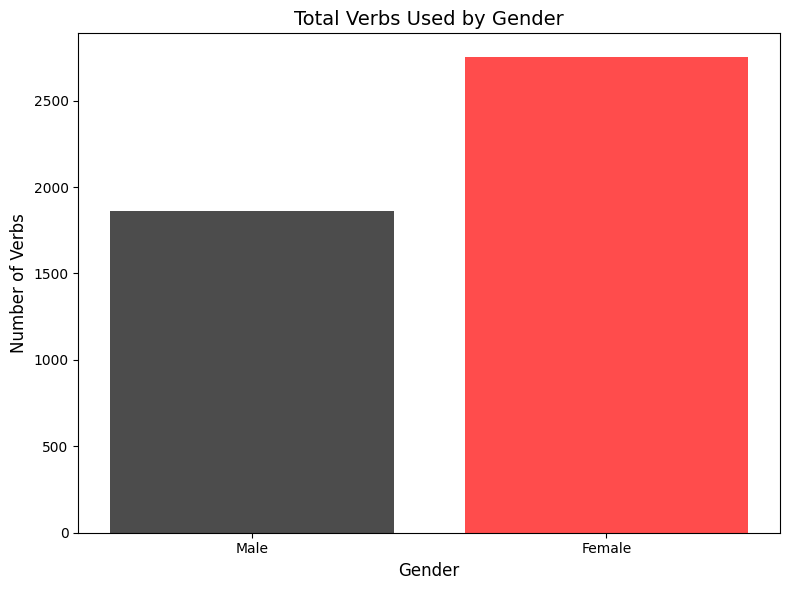

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = '/Users/kreestol/Downloads/RE2_Transcript.csv'
dialogue_df = pd.read_csv(csv_file_path)

# Load the text file with action words
txt_file_path = '/Users/kreestol/Downloads/action words (1).txt'
with open(txt_file_path, 'r') as file:
    action_words = file.read().split('.')
action_words = [word.strip().lower() for word in action_words if word.strip()]

# Function to match verbs in a line and categorize by gender
def match_verbs_and_categorize(dialogue_df, action_words):
    male_verb_count = 0
    female_verb_count = 0

    for _, row in dialogue_df.iterrows():
        line = str(row['Line']).lower()
        gender = str(row['Gender']).strip().lower()
        for verb in action_words:
            if verb in line:
                if gender == 'male':
                    male_verb_count += 1
                elif gender == 'female':
                    female_verb_count += 1

    return male_verb_count, female_verb_count

# Count the verbs spoken by male and female characters
male_verb_count, female_verb_count = match_verbs_and_categorize(dialogue_df, action_words)

# Print results
print(f"Male characters used {male_verb_count} verbs.")
print(f"Female characters used {female_verb_count} verbs.")

# Visualization
categories = ['Male', 'Female']
verb_counts = [male_verb_count, female_verb_count]
colors = ['black', 'red']  # Assign black to male and red to female

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, verb_counts, color=colors, alpha=0.7)  # Set colors
plt.title('Total Verbs Used by Gender', fontsize=14)
plt.ylabel('Number of Verbs', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


The previous code was created with a lot of help (thank you ChatGPT) and a lot of thinking about how to properly pick out the action words. I made the decision to only use a list of 3,000 common, present tense verbs in English. I chose present tense because present tense would be more likely to progress the story forward. For example, "We need to hide!" vs. "We hid in the bathroom." It is the difference between pushing the story forward and offering back story. Surprisingly, the count was not what I expected it to be. I expected the male column to be higher as we learned that males tended to speak more than females and just populate the *Resident Evil* games more. To better understand why my initial line of thinking was wrong, I wanted to take another look at each of the characters.

Action words count by character and gender:
Narrator: 0 action words (Male: 0, Female: 0)
Leon: 1136 action words (Male: 1136, Female: 0)
Truck Driver: 0 action words (Male: 0, Female: 0)
Claire: 1278 action words (Male: 0, Female: 1278)
Kendo: 66 action words (Male: 66, Female: 0)
Marvin: 134 action words (Male: 134, Female: 0)
Ada: 530 action words (Male: 0, Female: 530)
Ben: 158 action words (Male: 158, Female: 0)
Annette: 628 action words (Male: 0, Female: 628)
Umbrella Soldier 1: 0 action words (Male: 0, Female: 0)
William: 28 action words (Male: 28, Female: 0)
Umbrella Soldier 2: 0 action words (Male: 0, Female: 0)
Alpha Team Leader: 0 action words (Male: 0, Female: 0)
Computer: 0 action words (Male: 0, Female: 0)
Sherry: 316 action words (Male: 0, Female: 316)
Cop: 0 action words (Male: 0, Female: 0)
Pilot: 0 action words (Male: 0, Female: 0)
Irons: 338 action words (Male: 338, Female: 0)
Umbrella Soldier 3: 0 action words (Male: 0, Female: 0)


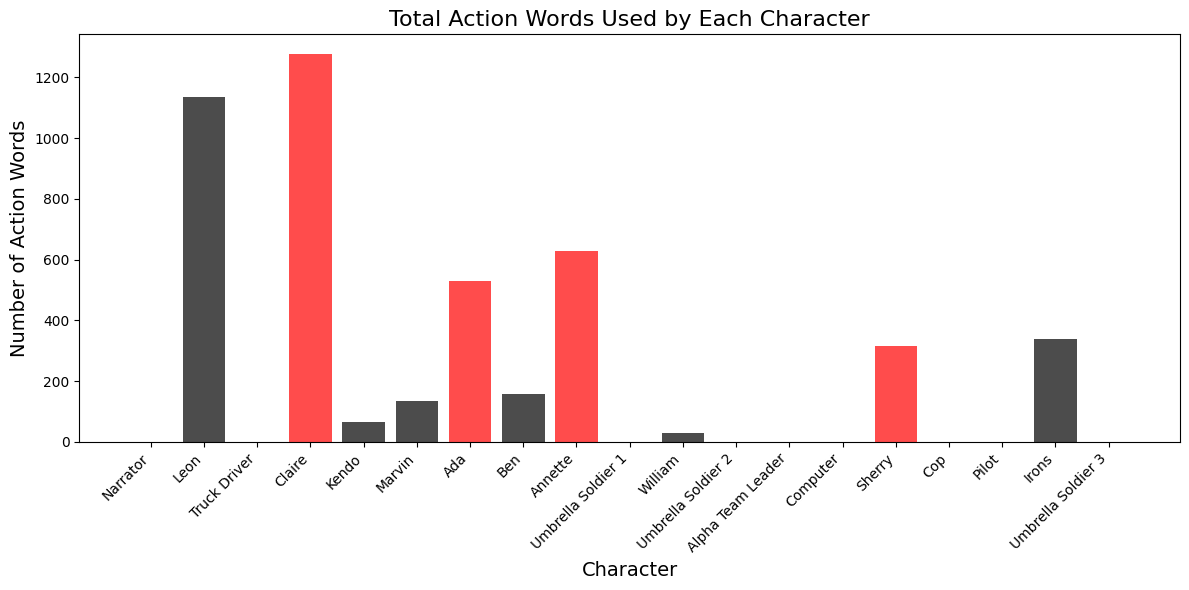

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = '/Users/kreestol/Downloads/RE2_Transcript.csv'
dialogue_df = pd.read_csv(csv_file_path)

# Load the text file with action words
txt_file_path = '/Users/kreestol/Downloads/action words (1).txt'
with open(txt_file_path, 'r') as file:
    action_words = file.read().split('.')
action_words = [word.strip().lower() for word in action_words if word.strip()]

# Function to count action words spoken by each character
def count_action_words_by_character(dialogue_df, action_words):
    character_counts = {}

    for _, row in dialogue_df.iterrows():
        line = str(row['Line']).lower()
        character = str(row['Character']).strip()
        gender = str(row['Gender']).strip().lower()

        # Initialize character in dictionary if not present
        if character not in character_counts:
            character_counts[character] = {'male': 0, 'female': 0, 'gender': gender}

        # Count action words in the line
        action_word_count = sum(1 for verb in action_words if verb in line)

        # Update the count based on gender
        if gender == 'male':
            character_counts[character]['male'] += action_word_count
        elif gender == 'female':
            character_counts[character]['female'] += action_word_count

    return character_counts

# Count action words spoken by each character
character_counts = count_action_words_by_character(dialogue_df, action_words)

# Display results
print("Action words count by character and gender:")
for character, counts in character_counts.items():
    total_action_words = counts['male'] + counts['female']
    print(f"{character}: {total_action_words} action words (Male: {counts['male']}, Female: {counts['female']})")

# Prepare data for visualization
characters = list(character_counts.keys())
total_counts = [counts['male'] + counts['female'] for counts in character_counts.values()]
colors = ['black' if character_counts[char]['gender'] == 'male' else 'red' for char in characters]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(characters, total_counts, color=colors, alpha=0.7)
plt.title('Total Action Words Used by Each Character', fontsize=16)
plt.ylabel('Number of Action Words', fontsize=14)
plt.xlabel('Character', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


    


Seeing the breakdown causes it to make a little more sense. Because we did not assign gender to a lot of side characters or characters only mentioned once or twice (where the gender was not clear, they were not accounted for.) Additionally, the action word count between Claire and Leon isn't too far off -- this makes sense considering they are both the main playable characters. Additionally, Claire is portrayed as a very strong character who takes action. It makes sense for her to be driving the story as much if not more than Leon. Furthermore, the higher count of female characters is consistent with the fact that there are more engaging female characters in *Resident Evil 2* than there are male characters. Ada also plays a big role in pushing forward the story and is of special interest to Leon. I will say a limitation of this data is not knowing the exact action words each of the characters used. Additionally, I believe it would be helpful to analyze the data from a linguisitic point of view (which I do not have) to better understand the role action verbs serve in *Resident Evil* overall.
